# Author: Jose Guzman


In [ ]:
# Install the packages listed in requirements.txt
!pip install -r requirements.txt

ERROR: Could not find a version that satisfies the requirement sklearn.preproccessing (from versions: none)
ERROR: No matching distribution found for sklearn.preproccessing


# Data Importing

In [2]:
import pandas as pd

df = pd.read_csv('data/atp_tennis.csv')
print(df.head())


                           Tournament        Date         Series    Court  \
0  Australian Hardcourt Championships  2000-01-03  International  Outdoor   
1  Australian Hardcourt Championships  2000-01-03  International  Outdoor   
2  Australian Hardcourt Championships  2000-01-03  International  Outdoor   
3  Australian Hardcourt Championships  2000-01-03  International  Outdoor   
4  Australian Hardcourt Championships  2000-01-03  International  Outdoor   

  Surface      Round  Best of        Player_1       Player_2       Winner  \
0    Hard  1st Round        3      Dosedel S.    Ljubicic I.   Dosedel S.   
1    Hard  1st Round        3      Clement A.     Enqvist T.   Enqvist T.   
2    Hard  1st Round        3       Escude N.  Baccanello P.    Escude N.   
3    Hard  1st Round        3  Knippschild J.     Federer R.   Federer R.   
4    Hard  1st Round        3     Fromberg R.  Woodbridge T.  Fromberg R.   

   Rank_1  Rank_2  Pts_1  Pts_2  Odd_1  Odd_2        Score  
0      63    

In [12]:
# Display summary statistics of the dataset
df.describe(include='all')

,Tournament,Date,Series,Court,Surface,Round,Best of,Player_1,Player_2,Winner,Rank_1,Rank_2,Pts_1,Pts_2,Odd_1,Odd_2,Score
count,63079,63079,63079,63079,63079,63079,63079.000000,63079,63079,63079,63079.000000,63079.000000,63079.00000,63079.000000,63079.000000,63079.000000,63079
unique,263,6096,8,2,4,8,NaN,1449,1446,1118,NaN,NaN,NaN,NaN,NaN,NaN,6844
top,French Open,2001-01-15,ATP250,Outdoor,Hard,1st Round,NaN,Federer R.,Federer R.,Federer R.,NaN,NaN,NaN,NaN,NaN,NaN,6-3 6-4
freq,3052,125,16473,51821,33918,28937,NaN,668,725,1151,NaN,NaN,NaN,NaN,NaN,NaN,1146
mean,NaN,NaN,NaN,NaN,NaN,NaN,3.376322,NaN,NaN,NaN,75.874380,75.545792,1104.95699,1111.239636,2.174835,2.165586,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,0.781687,NaN,NaN,NaN,100.463901,101.198603,1709.53914,1736.369386,2.788854,2.747397,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,3.000000,NaN,NaN,NaN,-1.000000,-1.000000,-1.00000,-1.000000,-1.000000,-1.000000,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,3.000000,NaN,NaN,NaN,24.000000,24.000000,16.50000,18.500000,1.220000,1.220000,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,3.000000,NaN,NaN,NaN,53.000000,54.000000,680.00000,681.000000,1.660000,1.660000,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,3.000000,NaN,NaN,NaN,92.000000,92.000000,1215.00000,1220.000000,2.625000,2.620000,NaN


Define Function to Handle Missing Values 

In [3]:
def handle_missing_values(df):
    # Drop columns with more than 50% missing values
    df = df.dropna(thresh=len(df) * 0.5, axis=1)
    # Forward fill remaining missing values
    df = df.ffill()
    return df



String Manipulation

In [4]:
def split_player_name(df, player_column):
    names = df[player_column].str.split(' ', n=1, expand=True)
    last_name_col = f"{player_column}_Last_Name"
    first_initial_col = f"{player_column}_First_Initial"
    df[last_name_col] = names[0]
    df[first_initial_col] = names[1].str[0]
    df.drop(columns=[player_column], inplace=True)
    return df



Read the CSV File

In [5]:
def split_player_name(df, player_column):
    names = df[player_column].str.split(' ', n=1, expand=True)
    last_name_col = f"{player_column}_Last_Name"
    first_initial_col = f"{player_column}_First_Initial"
    df[last_name_col] = names[0]
    df[first_initial_col] = names[1].str[0]
    df.drop(columns=[player_column], inplace=True)
    return df


Handling Missing Values

In [6]:
df = handle_missing_values(df)


Split Player Names

In [7]:
if 'Player_1' in df.columns and 'Player_2' in df.columns:
    df = split_player_name(df, 'Player_1')
    df = split_player_name(df, 'Player_2')
else:
    print("Required columns 'Player_1' and 'Player_2' are not present in the DataFrame.")


Convert Data Column to Datatime

In [8]:
if 'Date' in df.columns:
    try:
        df['Date'] = pd.to_datetime(df['Date'])
    except Exception as e:
        print(f"Error converting 'Date' column: {e}")



Save Modified DataFrame to new CSV File

In [9]:
output_file = 'data/atp_tennis_modified.csv'
df.to_csv(output_file, index=False)

print("ATP Tennis file has been processed and saved successfully.")



ATP Tennis file has been processed and saved successfully.


Review Dataframe 

In [10]:
df.head()


,Tournament,Date,Series,Court,Surface,Round,Best of,Winner,Rank_1,Rank_2,Pts_1,Pts_2,Odd_1,Odd_2,Score,Player_1_Last_Name,Player_1_First_Initial,Player_2_Last_Name,Player_2_First_Initial
0,Australian Hardcourt Championships,2000-01-03,International,Outdoor,Hard,1st Round,3,Dosedel S.,63,77,-1,-1,-1.0,-1.0,6-4 6-2,Dosedel,S,Ljubicic,I
1,Australian Hardcourt Championships,2000-01-03,International,Outdoor,Hard,1st Round,3,Enqvist T.,56,5,-1,-1,-1.0,-1.0,3-6 3-6,Clement,A,Enqvist,T
2,Australian Hardcourt Championships,2000-01-03,International,Outdoor,Hard,1st Round,3,Escude N.,40,655,-1,-1,-1.0,-1.0,6-7 7-5 6-3,Escude,N,Baccanello,P
3,Australian Hardcourt Championships,2000-01-03,International,Outdoor,Hard,1st Round,3,Federer R.,87,65,-1,-1,-1.0,-1.0,1-6 4-6,Knippschild,J,Federer,R
4,Australian Hardcourt Championships,2000-01-03,International,Outdoor,Hard,1st Round,3,Fromberg R.,81,198,-1,-1,-1.0,-1.0,7-6 5-7 6-4,Fromberg,R,Woodbridge,T


In [11]:
# Function to parse scores
def parse_scores(score_str, num_sets):
    try:
        # Split the score string by spaces to get individual sets
        sets = score_str.split(' ')
        player_1_scores = [None] * num_sets
        player_2_scores = [None] * num_sets
        
        for i, set_score in enumerate(sets):
            p1_score, p2_score = map(int, set_score.split('-'))
            player_1_scores[i] = p1_score
            player_2_scores[i] = p2_score
        
        return player_1_scores, player_2_scores
    except Exception as e:
        # Handle any unexpected format issues
        return [None] * num_sets, [None] * num_sets

In [12]:
# Function to calculate sets won
def calculate_sets_won(df, player):
    sets_won = []
    for index, row in df.iterrows():
        player_sets_won = 0
        for i in range(1, row['Best of'] + 1):
            if row[f'Player_{player}_Set_{i}'] is not None and row[f'Player_{player}_Set_{i}'] > row[f'Player_{3-player}_Set_{i}']:
                player_sets_won += 1
        sets_won.append(player_sets_won)
    return sets_won


Let's find a Tennis Player's Match History 

In [16]:
# Function to filter matches based on user input and create an output CSV
def filter_and_create_csv(player_last_name, player_first_initial, start_year, end_year, best_of_games):
    # Load the dataset
    file_path = 'data/atp_tennis_modified.csv'  # Update with the correct file path
    df = pd.read_csv(file_path)
    
    # Debugging: Print column names in the initial DataFrame
    print(f"Initial DataFrame columns: {df.columns.tolist()}")
    
    # Filter the dataset based on the year range
    df['Date'] = pd.to_datetime(df['Date'])
    df = df[(df['Date'].dt.year >= start_year) & (df['Date'].dt.year <= end_year)]
    
    # Debugging: Print the filtered DataFrame based on year range
    print(f"Matches found for year range {start_year}-{end_year}: {len(df)}")
    print(f"Columns after year filter: {df.columns.tolist()}")
    
    # Filter the dataset based on the number of best-of games
    df = df[df['Best of'] == best_of_games]
    
    # Debugging: Print the filtered DataFrame based on best-of games
    print(f"Matches found for best-of {best_of_games}: {len(df)}")
    print(f"Columns after best-of filter: {df.columns.tolist()}")
    
    if df.empty:
        print("No matches found for the given year range and best-of games.")
        return None
    
    # Determine match outcomes for the specified player
    df['Outcome'] = df['Winner'].apply(lambda x: 'Win' if player_last_name in x and player_first_initial in x else 'Loss')
    
    # Split and parse scores
    df['Best of'] = df['Best of'].astype(int)
    max_sets = df['Best of'].max()
    for i in range(1, max_sets + 1):
        df[f'Player_1_Set_{i}'] = None
        df[f'Player_2_Set_{i}'] = None
    parsed_scores = df.apply(lambda row: parse_scores(row['Score'], row['Best of']), axis=1)
    for i in range(max_sets):
        df[f'Player_1_Set_{i+1}'] = parsed_scores.apply(lambda x: x[0][i] if len(x[0]) > i else None)
        df[f'Player_2_Set_{i+1}'] = parsed_scores.apply(lambda x: x[1][i] if len(x[1]) > i else None)
    df = df.dropna(subset=[f'Player_1_Set_{i+1}' for i in range(max_sets)])
    df['Player_1_Sets_Won'] = calculate_sets_won(df, 1)
    df['Player_2_Sets_Won'] = calculate_sets_won(df, 2)
    df['Outcome'] = df['Player_1_Sets_Won'].apply(lambda x: 'Win' if x > (max_sets // 2) else 'Loss')
    
    # Enhanced filtering logic for player name
    df_player = df[((df['Player_1_Last_Name'].str.strip().str.lower() == player_last_name.lower()) & (df['Player_1_First_Initial'].str.strip().str.lower() == player_first_initial.lower())) | 
                   ((df['Player_2_Last_Name'].str.strip().str.lower() == player_last_name.lower()) & (df['Player_2_First_Initial'].str.strip().str.lower() == player_first_initial.lower()))]
    
    # Debugging: Print the filtered DataFrame based on player name
    print(f"Matches found for player {player_last_name} {player_first_initial}: {len(df_player)}")
    print(f"Columns after player name filter: {df_player.columns.tolist()}")
    
    if df_player.empty:
        print("No matches found for the specified player.")
        return None
    
    # Create an output CSV specific to the player
    output_file = f'data/{player_last_name}_{player_first_initial}_matches_{start_year}_{end_year}_best_of_{best_of_games}.csv'
    df_player.to_csv(output_file, index=False)
    print(f'Output CSV created: {output_file}')
    return df_player

# Function to get user inputs and validate them
def get_valid_input():
    while True:
        player_last_name = input("Enter player's last name: ")
        player_first_initial = input("Enter player's first initial: ")
        try:
            start_year = int(input("Enter start year: "))
            end_year = int(input("Enter end year: "))
            best_of_games = int(input("Enter number of best-of games: "))
        except ValueError:
            print("Invalid input. Please enter valid numeric values for years and best-of games.")
            continue
        
        df_player = filter_and_create_csv(player_last_name, player_first_initial, start_year, end_year, best_of_games)
        if df_player is not None:
            return df_player

# Get user inputs and filter matches
df_player = get_valid_input()

# Display the first few rows of the filtered dataset
if df_player is not None:
    display(df_player.head())

Initial DataFrame columns: ['Tournament', 'Date', 'Series', 'Court', 'Surface', 'Round', 'Best of', 'Winner', 'Rank_1', 'Rank_2', 'Pts_1', 'Pts_2', 'Odd_1', 'Odd_2', 'Score', 'Player_1_Last_Name', 'Player_1_First_Initial', 'Player_2_Last_Name', 'Player_2_First_Initial']
Matches found for year range 2018-2023: 13850
Columns after year filter: ['Tournament', 'Date', 'Series', 'Court', 'Surface', 'Round', 'Best of', 'Winner', 'Rank_1', 'Rank_2', 'Pts_1', 'Pts_2', 'Odd_1', 'Odd_2', 'Score', 'Player_1_Last_Name', 'Player_1_First_Initial', 'Player_2_Last_Name', 'Player_2_First_Initial']
Matches found for best-of 3: 11037
Columns after best-of filter: ['Tournament', 'Date', 'Series', 'Court', 'Surface', 'Round', 'Best of', 'Winner', 'Rank_1', 'Rank_2', 'Pts_1', 'Pts_2', 'Odd_1', 'Odd_2', 'Score', 'Player_1_Last_Name', 'Player_1_First_Initial', 'Player_2_Last_Name', 'Player_2_First_Initial']
Matches found for player Alcaraz C: 48
Columns after player name filter: ['Tournament', 'Date', 'Series

,Tournament,Date,Series,Court,Surface,Round,Best of,Winner,Rank_1,Rank_2,...,Player_2_First_Initial,Outcome,Player_1_Set_1,Player_2_Set_1,Player_1_Set_2,Player_2_Set_2,Player_1_Set_3,Player_2_Set_3,Player_1_Sets_Won,Player_2_Sets_Won
53200,Rio Open,2020-02-18,ATP500,Outdoor,Clay,1st Round,3,Alcaraz C.,406,41,...,A,Win,7.0,6.0,4.0,6.0,7.0,6.0,2,1
53213,Rio Open,2020-02-20,ATP500,Outdoor,Clay,2nd Round,3,Coria F.,406,116,...,F,Loss,4.0,6.0,6.0,4.0,4.0,6.0,1,2
54586,Miami Open,2021-03-25,Masters 1000,Outdoor,Hard,1st Round,3,Ruusuvuori E.,83,132,...,C,Win,6.0,4.0,2.0,6.0,7.0,5.0,2,1
54710,AnyTech365 Andalucia Open,2021-04-08,ATP250,Outdoor,Hard,2nd Round,3,Alcaraz C.,133,64,...,F,Win,4.0,6.0,6.0,2.0,6.0,4.0,2,1
54851,Millennium Estoril Open,2021-04-27,ATP250,Outdoor,Clay,1st Round,3,Cilic M.,120,42,...,M,Loss,3.0,6.0,6.0,1.0,4.0,6.0,1,2


In [22]:
# Check for missing values
missing_values = df.isnull().sum()
print(missing_values)


Tournament                0
Date                      0
Series                    0
Court                     0
Surface                   0
Round                     0
Best of                   0
Winner                    0
Rank_1                    0
Rank_2                    0
Pts_1                     0
Pts_2                     0
Odd_1                     0
Odd_2                     0
Score                     0
Player_1_Last_Name        0
Player_1_First_Initial    0
Player_2_Last_Name        0
Player_2_First_Initial    0
Outcome                   0
Player_1_Set_1            0
Player_2_Set_1            0
Player_1_Set_2            0
Player_2_Set_2            0
Player_1_Set_3            0
Player_2_Set_3            0
Player_1_Sets_Won         0
Player_2_Sets_Won         0
dtype: int64


## EDA

Import Libariries 

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


Load the Dataset

In [34]:
# Load the dataset
file_path = 'data/Alcaraz_C_matches_2018_2023_best_of_3.csv'
df = pd.read_csv(file_path)

# Display the first few rows of the dataset
df.head()


,Tournament,Date,Series,Court,Surface,Round,Best of,Winner,Rank_1,Rank_2,...,Player_2_First_Initial,Outcome,Player_1_Set_1,Player_2_Set_1,Player_1_Set_2,Player_2_Set_2,Player_1_Set_3,Player_2_Set_3,Player_1_Sets_Won,Player_2_Sets_Won
0,Rio Open,2020-02-18,ATP500,Outdoor,Clay,1st Round,3,Alcaraz C.,406,41,...,A,Win,7.0,6.0,4.0,6.0,7.0,6.0,2,1
1,Rio Open,2020-02-20,ATP500,Outdoor,Clay,2nd Round,3,Coria F.,406,116,...,F,Loss,4.0,6.0,6.0,4.0,4.0,6.0,1,2
2,Miami Open,2021-03-25,Masters 1000,Outdoor,Hard,1st Round,3,Ruusuvuori E.,83,132,...,C,Win,6.0,4.0,2.0,6.0,7.0,5.0,2,1
3,AnyTech365 Andalucia Open,2021-04-08,ATP250,Outdoor,Hard,2nd Round,3,Alcaraz C.,133,64,...,F,Win,4.0,6.0,6.0,2.0,6.0,4.0,2,1
4,Millennium Estoril Open,2021-04-27,ATP250,Outdoor,Clay,1st Round,3,Cilic M.,120,42,...,M,Loss,3.0,6.0,6.0,1.0,4.0,6.0,1,2


Inspect Data

In [35]:
# Check for missing values
missing_values = df.isnull().sum()
print("Missing values before handling:")
print(missing_values)

# Fill missing values for numerical columns with mean
for column in ['Player_1_Set_1', 'Player_2_Set_1', 'Player_1_Set_2', 'Player_2_Set_2', 'Player_1_Set_3', 'Player_2_Set_3']:
    df[column] = df[column].fillna(df[column].mean())

# Forward fill for 'Outcome' if it's missing
df['Outcome'] = df['Outcome'].ffill()

# Remove rows where 'Date' is missing
df = df.dropna(subset=['Date'])

# Check for missing values after handling
missing_values_after = df.isnull().sum()
print("Missing values after handling:")
print(missing_values_after)

Missing values before handling:
Tournament                0
Date                      0
Series                    0
Court                     0
Surface                   0
Round                     0
Best of                   0
Winner                    0
Rank_1                    0
Rank_2                    0
Pts_1                     0
Pts_2                     0
Odd_1                     0
Odd_2                     0
Score                     0
Player_1_Last_Name        0
Player_1_First_Initial    0
Player_2_Last_Name        0
Player_2_First_Initial    0
Outcome                   0
Player_1_Set_1            0
Player_2_Set_1            0
Player_1_Set_2            0
Player_2_Set_2            0
Player_1_Set_3            0
Player_2_Set_3            0
Player_1_Sets_Won         0
Player_2_Sets_Won         0
dtype: int64
Missing values after handling:
Tournament                0
Date                      0
Series                    0
Court                     0
Surface                   0


In [37]:
# Generate summary statistics
summary_stats = df.describe(include='all')
print(summary_stats)


       Tournament        Date        Series    Court Surface      Round  \
count          48          48            48       48      48         48   
unique         21          48             4        2       3          8   
top      Rio Open  2020-02-18  Masters 1000  Outdoor    Clay  2nd Round   
freq            7           1            22       44      25         11   
mean          NaN         NaN           NaN      NaN     NaN        NaN   
std           NaN         NaN           NaN      NaN     NaN        NaN   
min           NaN         NaN           NaN      NaN     NaN        NaN   
25%           NaN         NaN           NaN      NaN     NaN        NaN   
50%           NaN         NaN           NaN      NaN     NaN        NaN   
75%           NaN         NaN           NaN      NaN     NaN        NaN   
max           NaN         NaN           NaN      NaN     NaN        NaN   

        Best of      Winner      Rank_1      Rank_2  ...  \
count      48.0          48   48.000000

In [39]:
# Set seaborn style for plots
sns.set(style="whitegrid")

Descriptive Statistics 

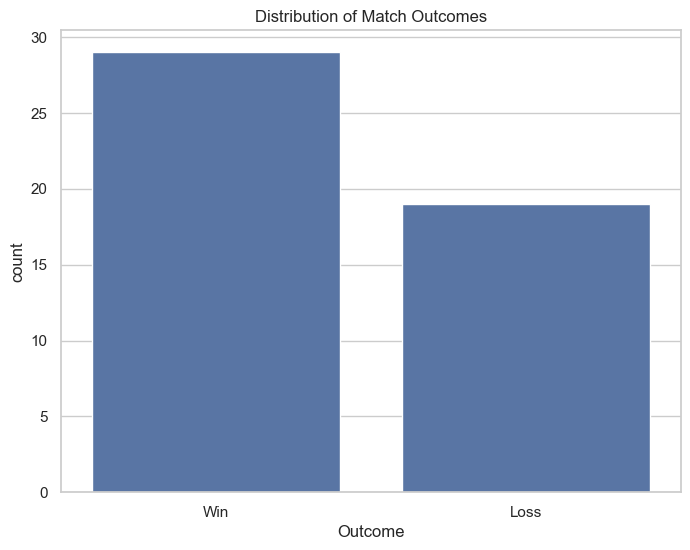

In [40]:
# Distribution of match outcomes
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Outcome')
plt.title('Distribution of Match Outcomes')
plt.show()

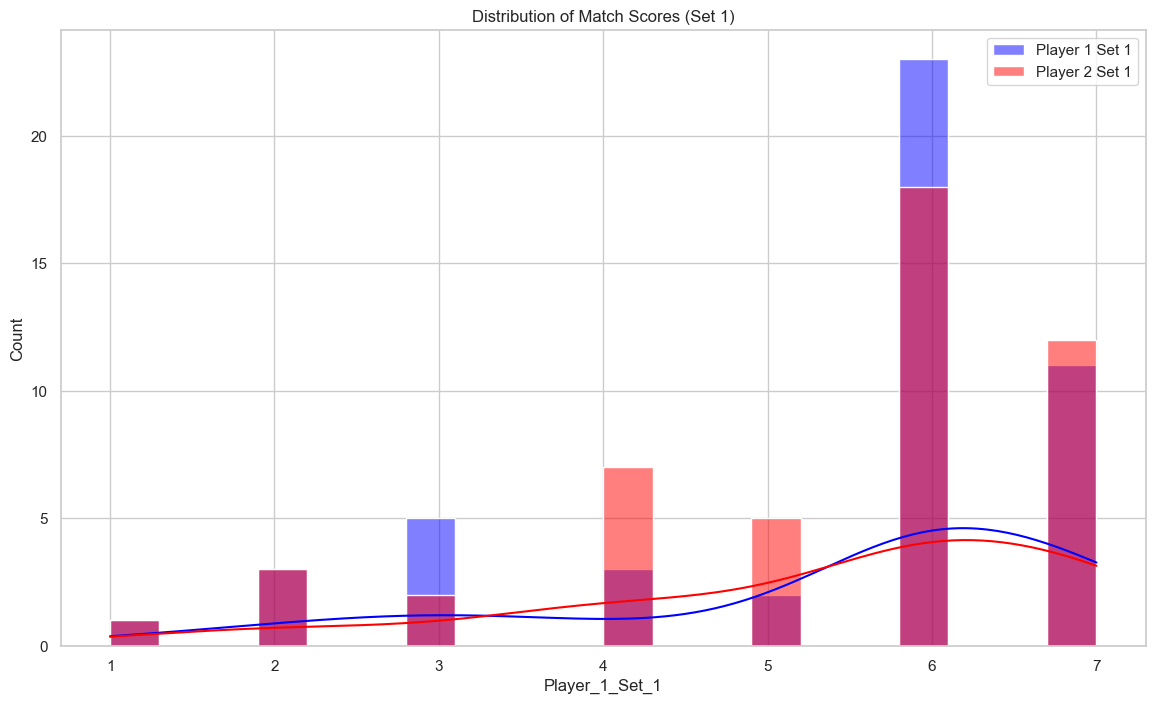

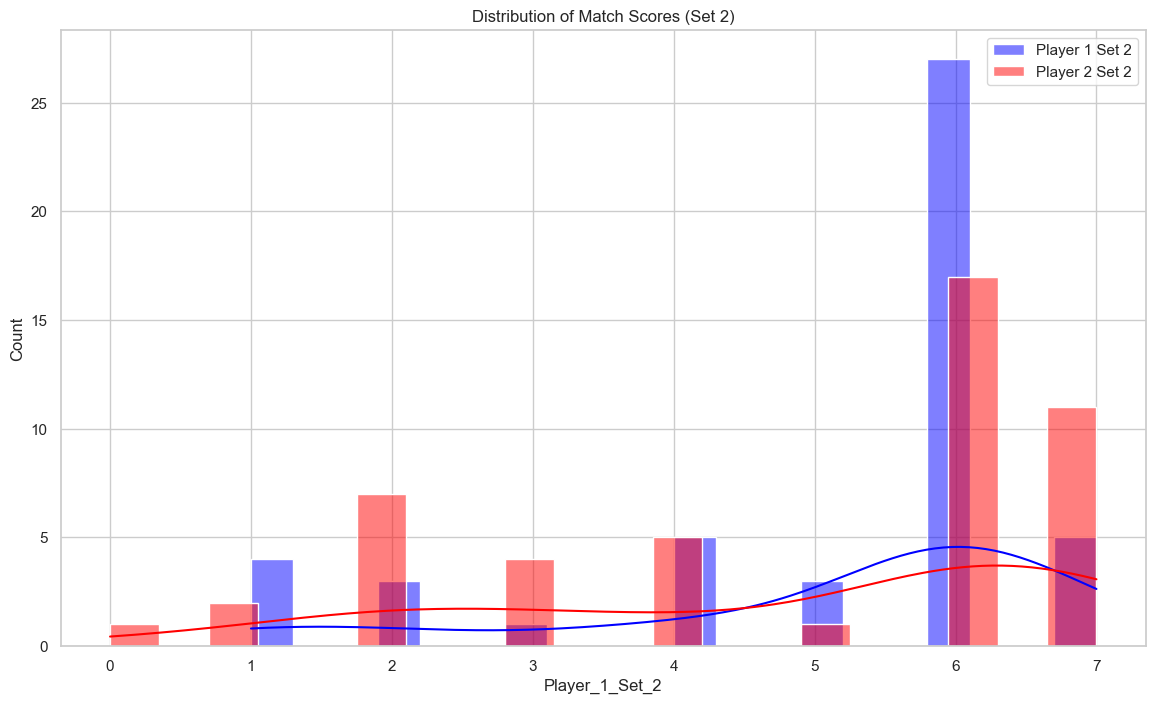

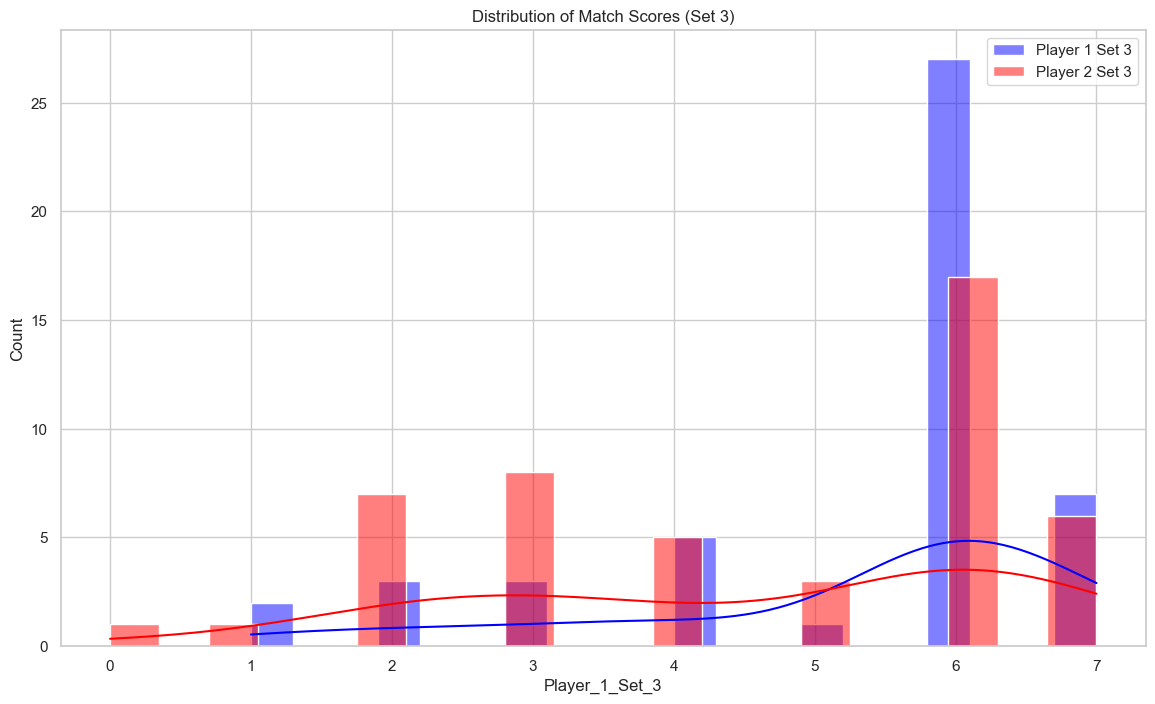

In [41]:
# Distribution of scores for each set
plt.figure(figsize=(14, 8))
sns.histplot(data=df, x='Player_1_Set_1', bins=20, kde=True, label='Player 1 Set 1', color='blue')
sns.histplot(data=df, x='Player_2_Set_1', bins=20, kde=True, label='Player 2 Set 1', color='red')
plt.title('Distribution of Match Scores (Set 1)')
plt.legend()
plt.show()

plt.figure(figsize=(14, 8))
sns.histplot(data=df, x='Player_1_Set_2', bins=20, kde=True, label='Player 1 Set 2', color='blue')
sns.histplot(data=df, x='Player_2_Set_2', bins=20, kde=True, label='Player 2 Set 2', color='red')
plt.title('Distribution of Match Scores (Set 2)')
plt.legend()
plt.show()

plt.figure(figsize=(14, 8))
sns.histplot(data=df, x='Player_1_Set_3', bins=20, kde=True, label='Player 1 Set 3', color='blue')
sns.histplot(data=df, x='Player_2_Set_3', bins=20, kde=True, label='Player 2 Set 3', color='red')
plt.title('Distribution of Match Scores (Set 3)')
plt.legend()
plt.show()


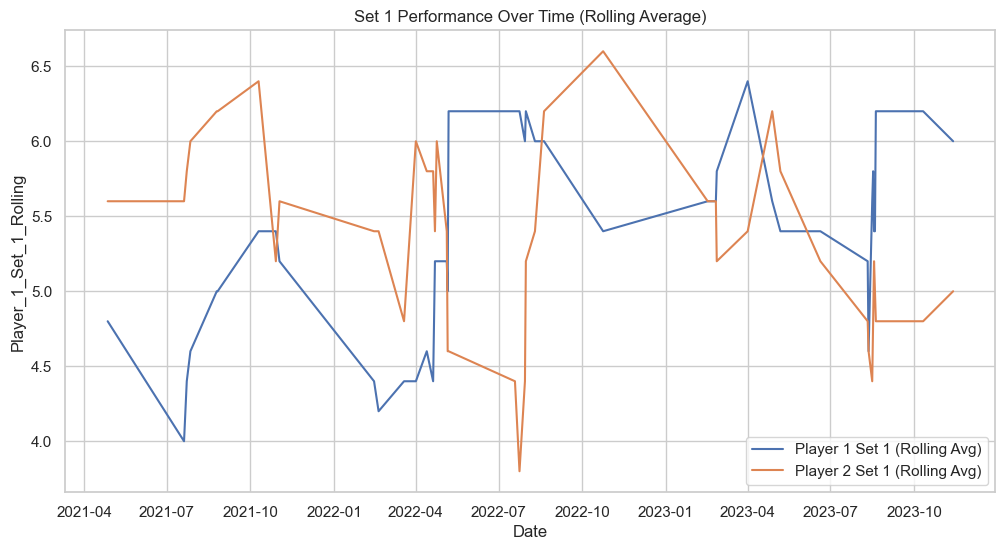

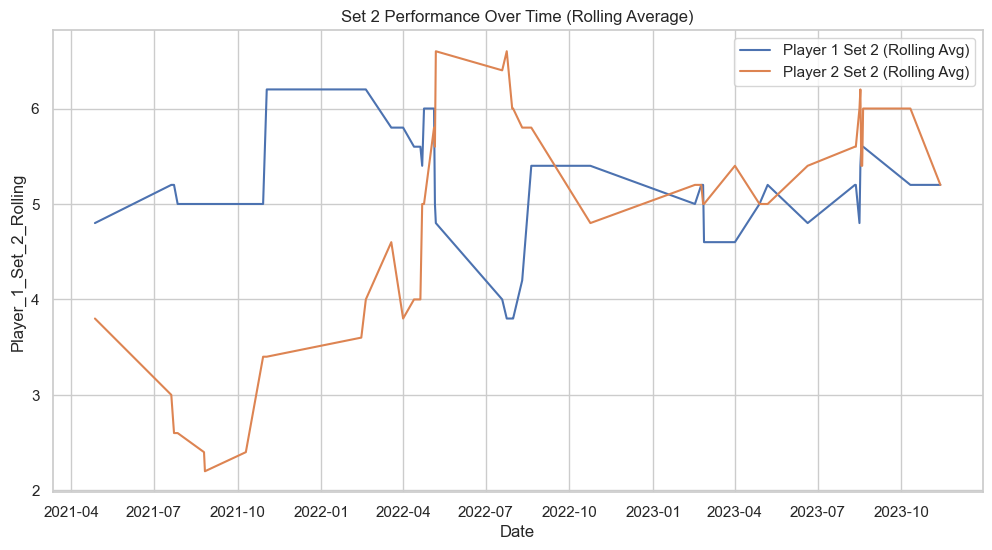

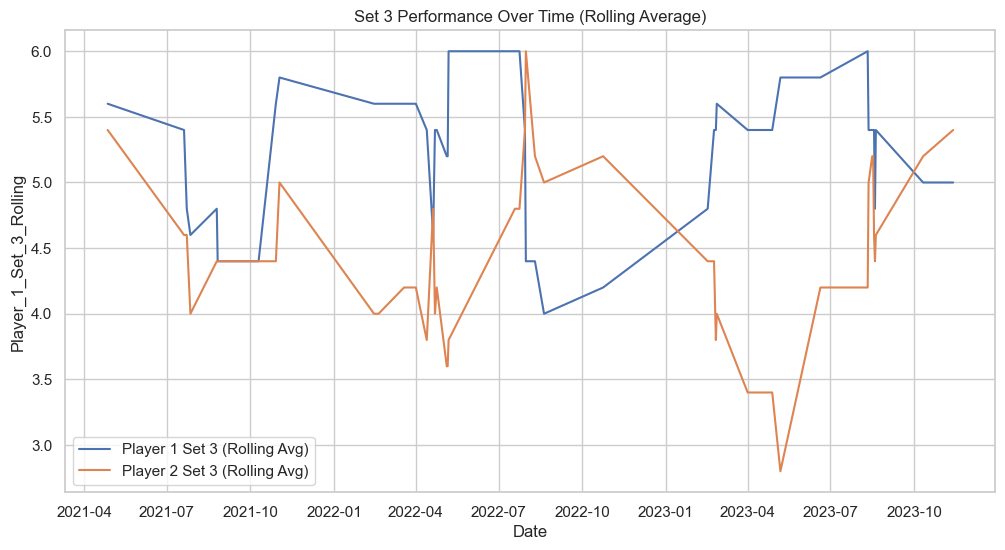

In [44]:
# Performance over time for each set with rolling average
df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values('Date')

# Define the window size for the rolling average
window_size = 5

# Apply rolling average
df['Player_1_Set_1_Rolling'] = df['Player_1_Set_1'].rolling(window=window_size).mean()
df['Player_2_Set_1_Rolling'] = df['Player_2_Set_1'].rolling(window=window_size).mean()
df['Player_1_Set_2_Rolling'] = df['Player_1_Set_2'].rolling(window=window_size).mean()
df['Player_2_Set_2_Rolling'] = df['Player_2_Set_2'].rolling(window=window_size).mean()
df['Player_1_Set_3_Rolling'] = df['Player_1_Set_3'].rolling(window=window_size).mean()
df['Player_2_Set_3_Rolling'] = df['Player_2_Set_3'].rolling(window=window_size).mean()

plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='Date', y='Player_1_Set_1_Rolling', label='Player 1 Set 1 (Rolling Avg)')
sns.lineplot(data=df, x='Date', y='Player_2_Set_1_Rolling', label='Player 2 Set 1 (Rolling Avg)')
plt.title('Set 1 Performance Over Time (Rolling Average)')
plt.show()

plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='Date', y='Player_1_Set_2_Rolling', label='Player 1 Set 2 (Rolling Avg)')
sns.lineplot(data=df, x='Date', y='Player_2_Set_2_Rolling', label='Player 2 Set 2 (Rolling Avg)')
plt.title('Set 2 Performance Over Time (Rolling Average)')
plt.show()

plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='Date', y='Player_1_Set_3_Rolling', label='Player 1 Set 3 (Rolling Avg)')
sns.lineplot(data=df, x='Date', y='Player_2_Set_3_Rolling', label='Player 2 Set 3 (Rolling Avg)')
plt.title('Set 3 Performance Over Time (Rolling Average)')
plt.show()

In [45]:
# Summary statistics for each set
print("Summary statistics for Player 1 Set 1:")
print(df['Player_1_Set_1'].describe())

print("Summary statistics for Player 2 Set 1:")
print(df['Player_2_Set_1'].describe())

print("Summary statistics for Player 1 Set 2:")
print(df['Player_1_Set_2'].describe())

print("Summary statistics for Player 2 Set 2:")
print(df['Player_2_Set_2'].describe())

print("Summary statistics for Player 1 Set 3:")
print(df['Player_1_Set_3'].describe())

print("Summary statistics for Player 2 Set 3:")
print(df['Player_2_Set_3'].describe())

Summary statistics for Player 1 Set 1:
count    48.000000
mean      5.395833
std       1.633943
min       1.000000
25%       4.750000
50%       6.000000
75%       6.000000
max       7.000000
Name: Player_1_Set_1, dtype: float64
Summary statistics for Player 2 Set 1:
count    48.000000
mean      5.375000
std       1.579456
min       1.000000
25%       4.000000
50%       6.000000
75%       6.250000
max       7.000000
Name: Player_2_Set_1, dtype: float64
Summary statistics for Player 1 Set 2:
count    48.000000
mean      5.104167
std       1.765383
min       1.000000
25%       4.000000
50%       6.000000
75%       6.000000
max       7.000000
Name: Player_1_Set_2, dtype: float64
Summary statistics for Player 2 Set 2:
count    48.000000
mean      4.833333
std       2.066278
min       0.000000
25%       3.000000
50%       6.000000
75%       6.000000
max       7.000000
Name: Player_2_Set_2, dtype: float64
Summary statistics for Player 1 Set 3:
count    48.000000
mean      5.270833
std       1